In [92]:
#import numpy as np
from mxnet import nd
x = nd.arange(12)
#print(x)
#print(x.shape)

x = x.reshape(3,4)
#print(x)

nd.ones((3 , 4))
nd.zeros((3 , 4))


nd.random.normal(0, 1, shape=(3, 4))

y = nd.array([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
#print(y)
#print(x+y)
#print(x/y)
#print(y.exp())
#print(x*y)
#print(nd.dot(x, y.T))

nd.concat(x, y, dim = 0)
nd.concat(x, y, dim = 1)

x==y
x.sum()
x.norm().asscalar()
print(x)
print(x.sum())
print(x.norm(ord=1, axis=0)) #默认ord=2()L2范数， x的L2范数 ， 矩阵的最大特征值开平方根
print(nd.norm(x,2))
print(x.norm().asscalar())
import numpy as np

p = np.ones((2, 3))
#print(p)
d = nd.array(p)
#print(d)
d.asnumpy()
#help(nd.norm)


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

[66.]
<NDArray 1 @cpu(0)>

[12. 15. 18. 21.]
<NDArray 4 @cpu(0)>

[22.494442]
<NDArray 1 @cpu(0)>
22.494442


array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [95]:
#自动求梯度
from mxnet import autograd, nd
x = nd.arange(4).reshape((4, 1))
print(x)
#print(x.grad)
with autograd.record():
    y = 2 * nd.dot(x.T, x)
#y.backward()
#assert(x.grad - 4*x).norm().asscalar() == 0
print(autograd.is_training())
with autograd.record():
    print(autograd.is_training())

def f(a):
    b = a * 2
    while b.norm().asscalar() < 1000:
        b = b * 2
    if b.sum().asscalar() > 0:
        c = b
    else:
        c = 100 + b
    return c
a = nd.random.normal(shape=1)
a.attach_grad()
with autograd.record():
    c = f(a)
c.backward()
a.grad == c / a
print(a)
print(a.grad)



[[0.]
 [1.]
 [2.]
 [3.]]
<NDArray 4x1 @cpu(0)>
False
True

[-0.62394905]
<NDArray 1 @cpu(0)>

[2048.]
<NDArray 1 @cpu(0)>


In [124]:
from mxnet import nd
print(dir(nd.random))
help(nd.ones_like)


['NDArray', '_Null', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_internal', '_random_helper', 'current_context', 'exponential', 'exponential_like', 'gamma', 'gamma_like', 'generalized_negative_binomial', 'generalized_negative_binomial_like', 'multinomial', 'negative_binomial', 'negative_binomial_like', 'normal', 'normal_like', 'numeric_types', 'poisson', 'poisson_like', 'randint', 'randn', 'shuffle', 'uniform', 'uniform_like']
Help on function ones_like:

ones_like(data=None, out=None, name=None, **kwargs)
    Return an array of ones with the same shape and type
    as the input array.
    
    Examples::
    
      x = [[ 0.,  0.,  0.],
           [ 0.,  0.,  0.]]
    
      ones_like(x) = [[ 1.,  1.,  1.],
                      [ 1.,  1.,  1.]]
    
    
    
    Parameters
    ----------
    data : NDArray
        The input
    
    out : NDArray, optional
        The output NDArray to hold the result.
    
 

In [131]:
from mxnet import nd
from time import time
a = nd.ones(shape=3).reshape((3,1))
print(a)


[[1.]
 [1.]
 [1.]]
<NDArray 3x1 @cpu(0)>


epoch: 1, loss: 0.039381
epoch: 2, loss: 0.000157
epoch: 3, loss: 0.000052
[2, -3.4] 
[[ 2.0004706]
 [-3.3997858]]
<NDArray 2x1 @cpu(0)>
4.2 
[4.199336]
<NDArray 1 @cpu(0)>


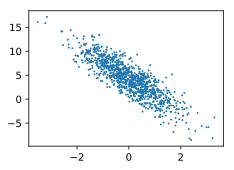

In [112]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(loc=0, scale=1, shape=(num_examples, num_inputs))
labels = true_w[0]*features[:,0] + true_w[1]*features[:,1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize']=figsize
    plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
    plt.rcParams['savefig.dpi'] = 300 #图片像素
    plt.rcParams['figure.dpi'] = 300 #分辨率
    
set_figsize()
plt.scatter(features[:,1].asnumpy(), labels.asnumpy(), s=1);
#help(nd.random.normal)
#print(features[:10,1].asnumpy())
#print(features[:,1])
#help(plt.scatter)

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) #样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i+batch_size, num_examples)])
        yield features.take(j), labels.take(j) #take 函数根据索引返回对应元素

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    #print(X, y)
    break

w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))
w.attach_grad()
b.attach_grad()

def linreg(X, w, b):
    return nd.dot(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

#help(nd.norm)        
        
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print("epoch: %d, loss: %f" %(epoch+1, train_l.mean().asnumpy()))

print(true_w, w)
print(true_b, b)